# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Bike Rentals` using an appropriate predictor variable.

##  Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import pandas as pd
import numpy as np

In [2]:
# Read the given CSV file, and view some sample records

day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [3]:
day.shape

(730, 16)

In [4]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Step 2: Visualising the Data
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to'cnt's.

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

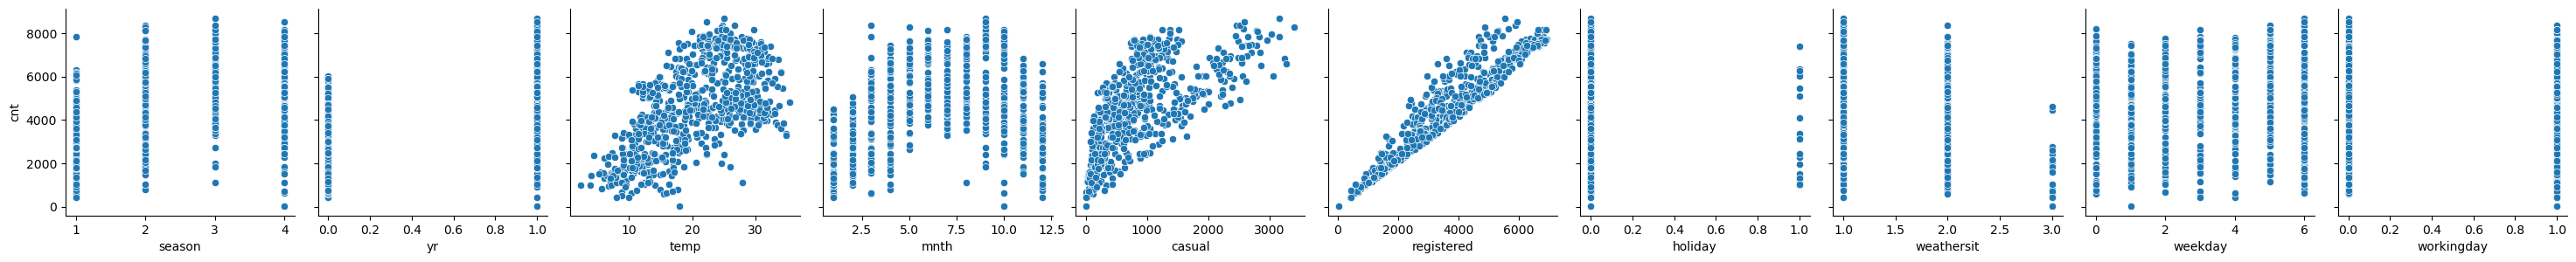

In [6]:
sns.pairplot(day, x_vars=['season', 'yr', 'temp','mnth' ,'casual','registered','holiday','weathersit','weekday','workingday'], y_vars='cnt',size=3, aspect=1, kind='scatter')
plt.show()

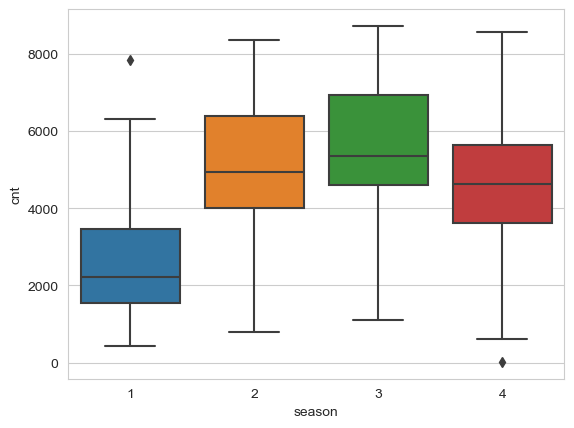

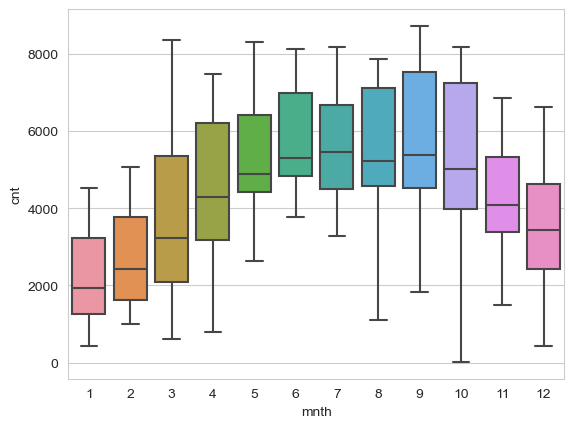

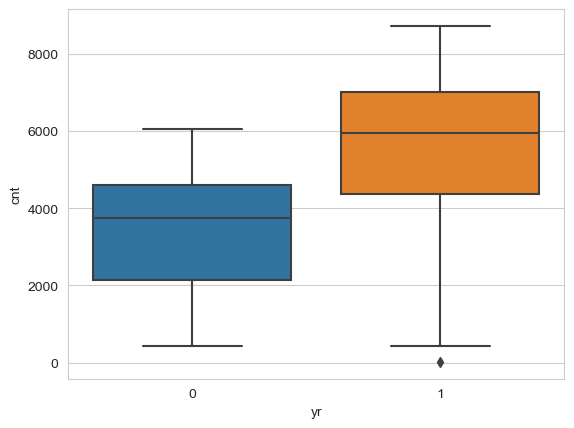

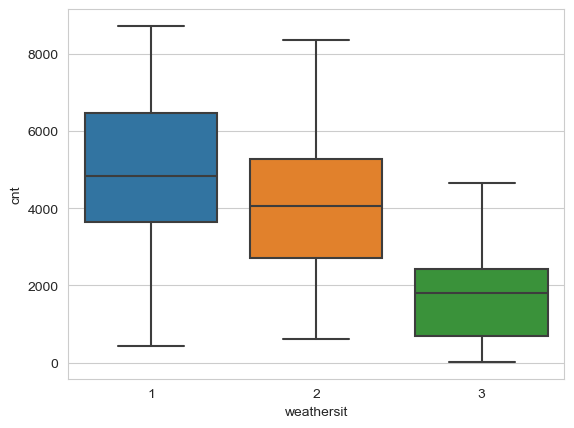

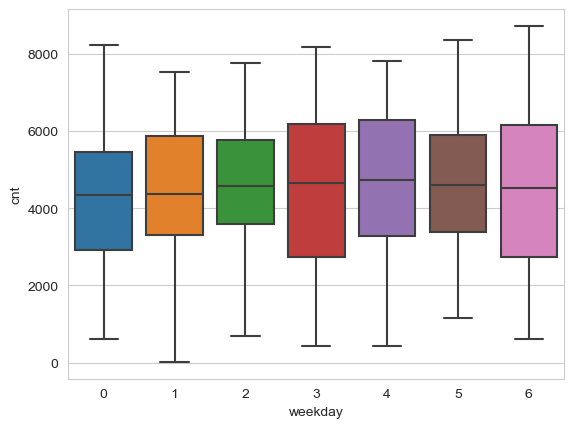

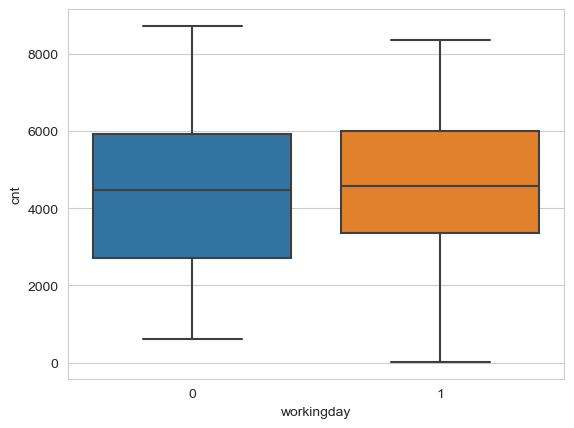

In [7]:
# load the dataset 
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.show()
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.show()
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.show()
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

In [8]:
# We can see from above instant is a serial number hence can be dropped
# atemp,hum,windspeed are highly correlated to temperature,hence dropping them
#Date also has unique values through out, which will not give any insight to the data. Hence dropping it. Also the day and month of the year is given in separate columns.
#cnt is a sum of Registered and casual we can drop these columns


day=day.drop(columns=['instant','atemp','hum', 'windspeed','dteday','registered','casual'],axis=1)

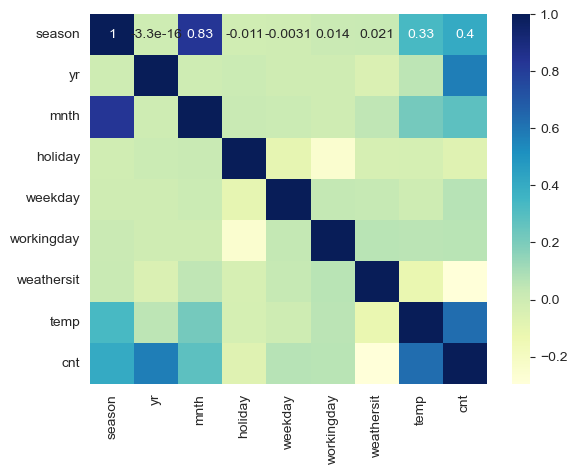

In [9]:
sns.heatmap(day.corr(), cmap="YlGnBu", annot = True)
plt.show()

### From above map we can see that cnt is highly correlated with temp,yr,season. ALso from the scatter plot we can see that temperature has a linear graph with cnt. Hence we can consider temp as our first variable  to train our model.


### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `temp`, in this case, to the variable `X` and the response variable, `cnt`, to the variable `y`.

In [10]:
X = day['temp']
y = day['cnt']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
# Let's now take a look at the train dataset

X_train.head()

653    19.201653
576    29.246653
426    16.980847
728    10.489153
482    15.443347
Name: temp, dtype: float64

In [13]:
# Let's now take a look at the train dataset

y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

Building a Linear Model
You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [14]:
import statsmodels.api as sm

In [15]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [16]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1088.043909
temp      169.051138
dtype: float64

In [17]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           5.80e-61
Time:                        22:46:17   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1088.0439    191.181      5.691      0.0

#### The R-squared value obtained is 0.414 it explains only around 40% of the variance. Hence we can conclude that we need to perform multiple linear regression to fit the model.

## Multiple Linear Regression

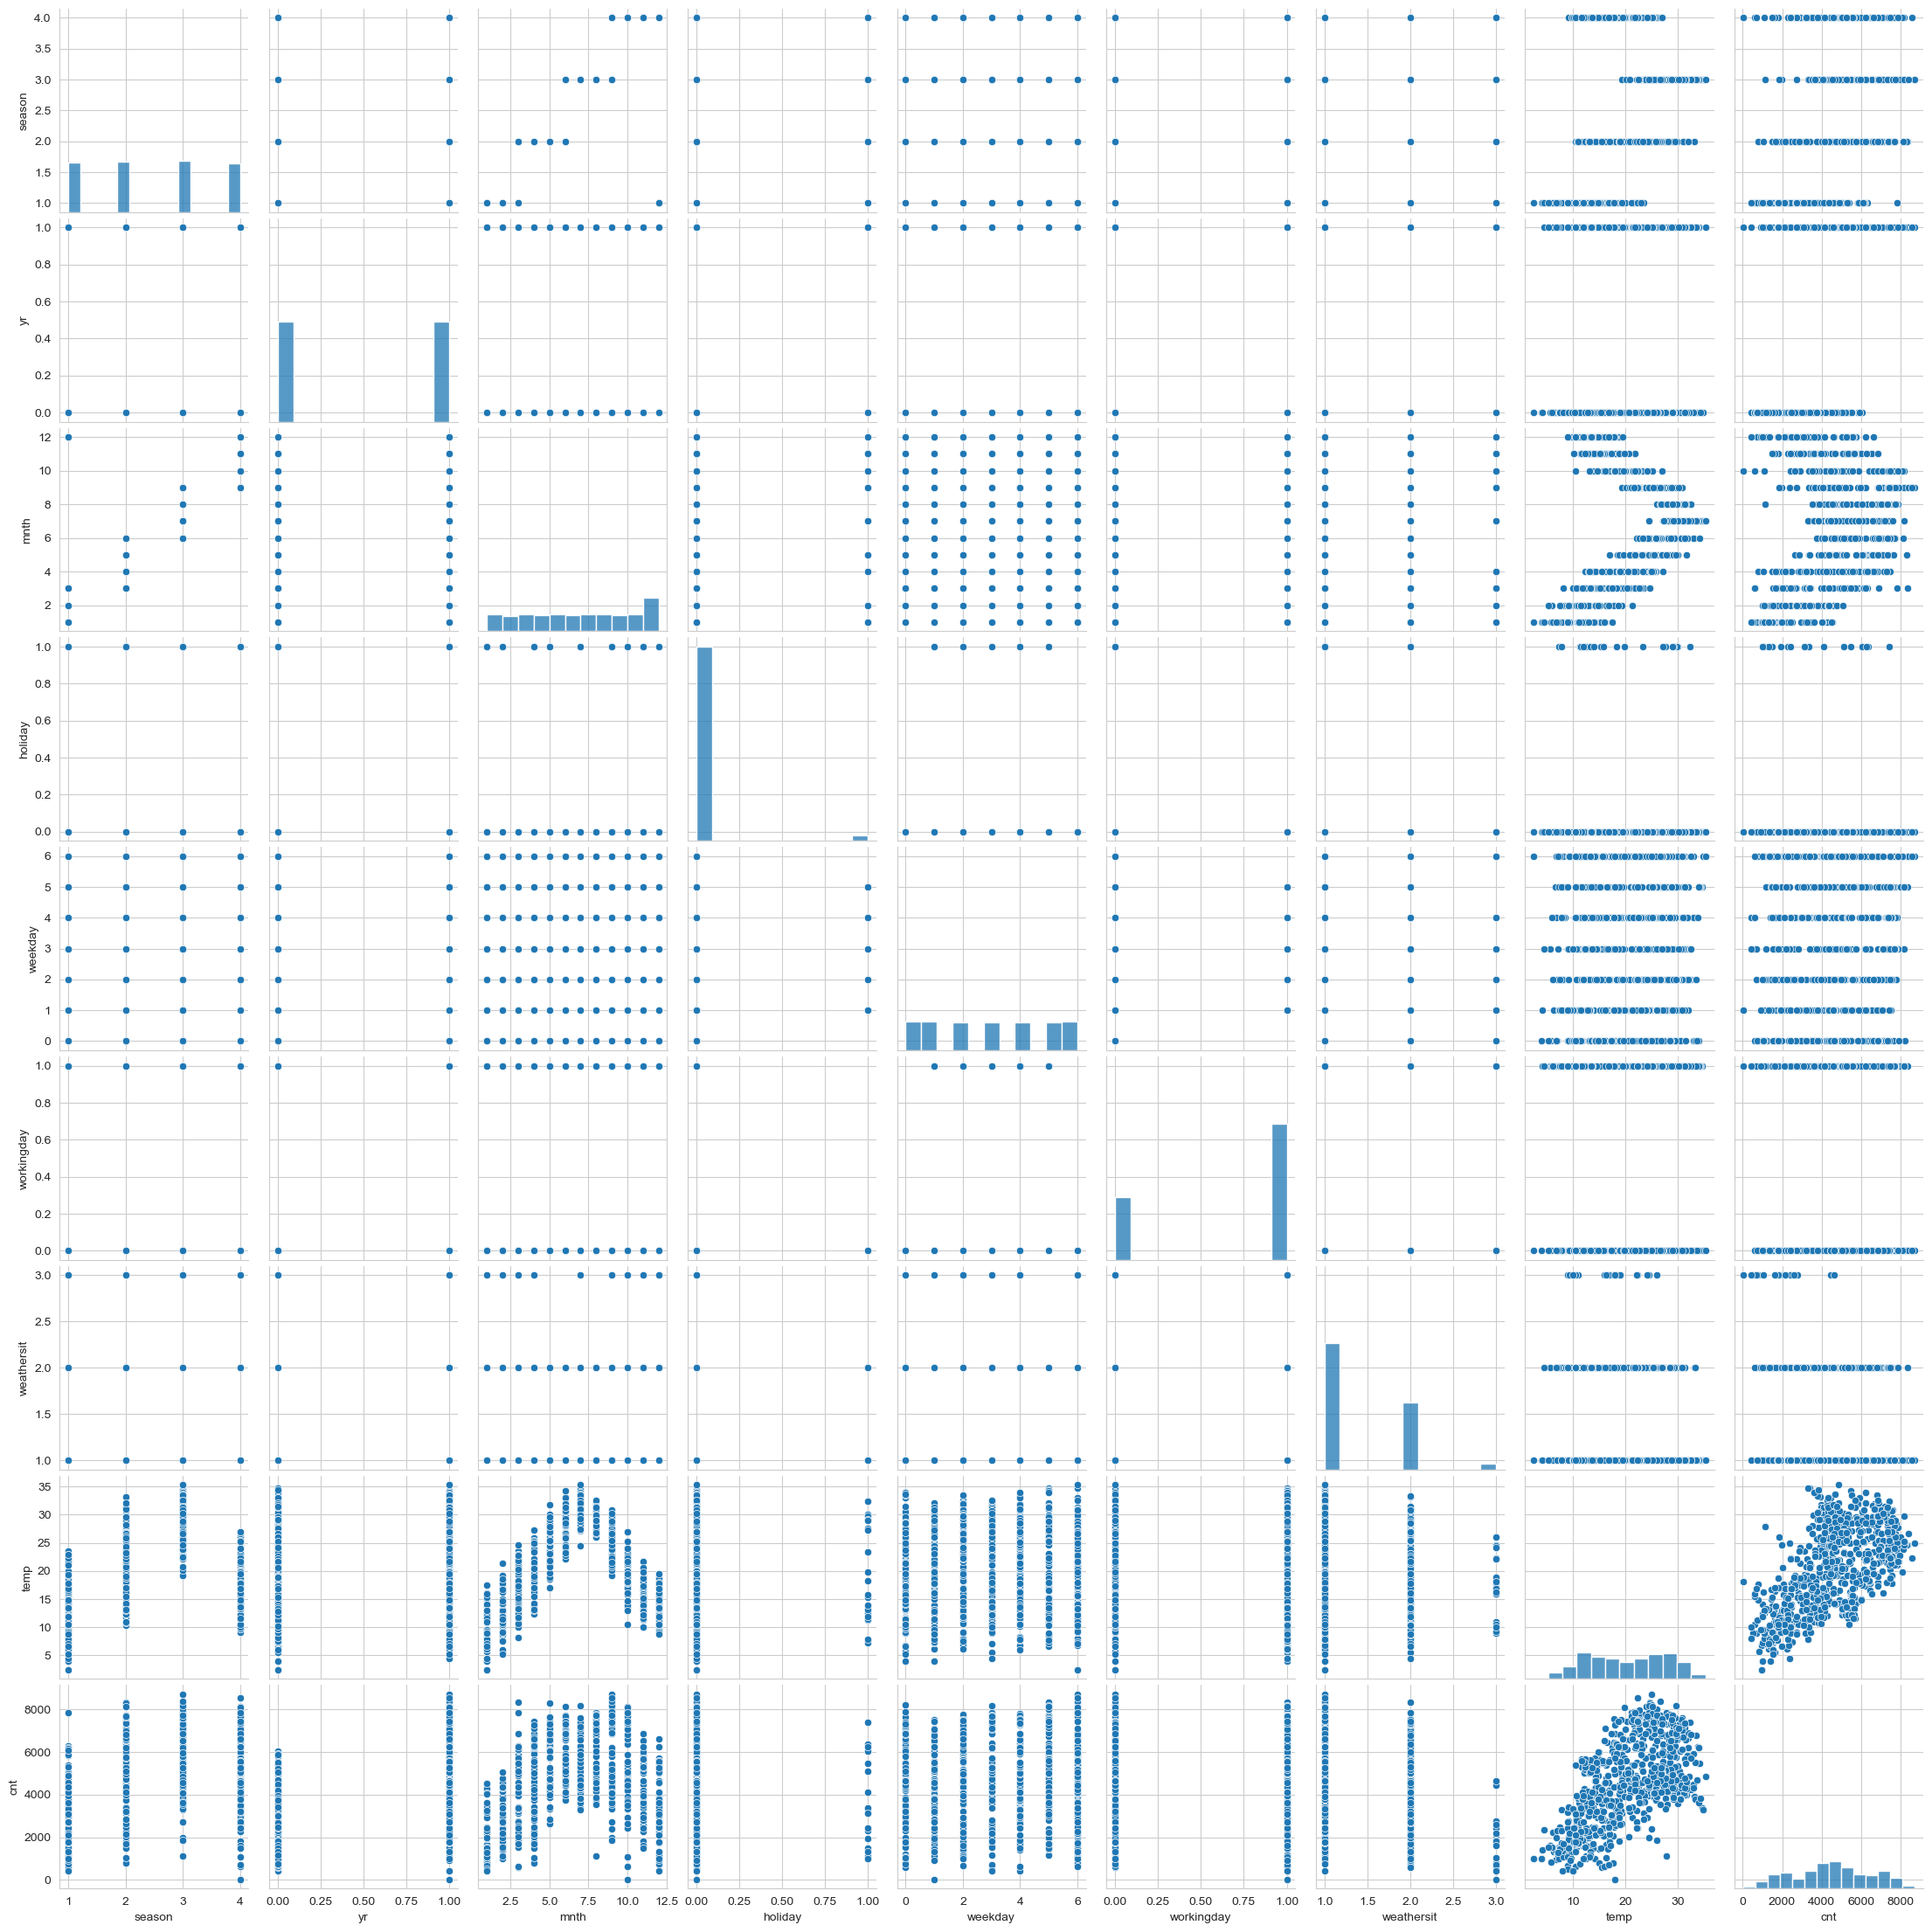

In [18]:
sns.pairplot(day)
plt.show()

#### we can see that holiday,weekday,workingday,weathersit does not show variation. Hence these must be the cloumns with high VIF, so can be dropped


In [19]:
#Dummy Variables
#As holiday can be found out by using  weekday and working day ,holiday can be dropped


#day = day.drop(columns=['holiday'],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
0,1,0,1,0,6,0,2,14.110847,985
1,1,0,1,0,0,0,2,14.902598,801
2,1,0,1,0,1,1,1,8.050924,1349
3,1,0,1,0,2,1,1,8.200000,1562
4,1,0,1,0,3,1,1,9.305237,1600


##  Splitting the Data into Training and Testing Sets
##### As you know, the first basic step for regression is performing a train-test split.

In [20]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
653,4,1,10,0,2,1,1,19.201653,7534
576,3,1,7,0,2,1,1,29.246653,7216
426,1,1,3,0,6,0,2,16.980847,4066
728,1,1,12,0,0,0,1,10.489153,1796
482,2,1,4,0,6,0,2,15.443347,4220


#### Rescaling the Features using Minmax scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
0,1,0,1,0,6,0,2,14.110847,985
1,1,0,1,0,0,0,2,14.902598,801
2,1,0,1,0,1,1,1,8.050924,1349
3,1,0,1,0,2,1,1,8.200000,1562
4,1,0,1,0,3,1,1,9.305237,1600


In [24]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['weekday', 'weathersit', 'temp', 'cnt','yr','season','mnth']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
653,1.000000,1.0,0.818182,0,0.333333,1,0.0,0.509887,0.864243
576,0.666667,1.0,0.545455,0,0.333333,1,0.0,0.815169,0.827658
426,0.000000,1.0,0.181818,0,1.000000,0,0.5,0.442393,0.465255
728,0.000000,1.0,1.000000,0,0.000000,0,0.0,0.245101,0.204096
482,0.333333,1.0,0.272727,0,1.000000,0,0.5,0.395666,0.482973


In [26]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.505882,0.507843,0.504456,0.025490,0.498366,0.676471,0.20098,0.537262,0.513620
std,0.370649,0.500429,0.315338,0.157763,0.336182,0.468282,0.27377,0.225844,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.00000,0.339853,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.00000,0.540519,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.50000,0.735215,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


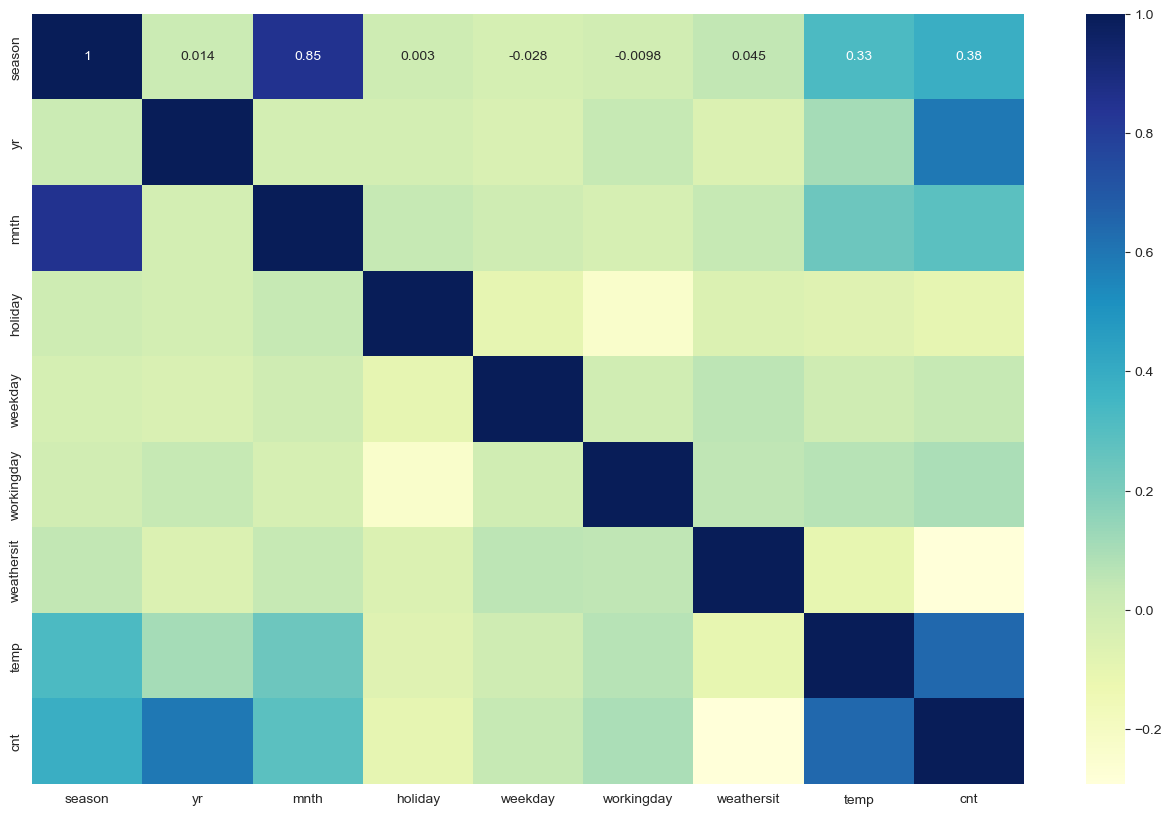

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [29]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [30]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

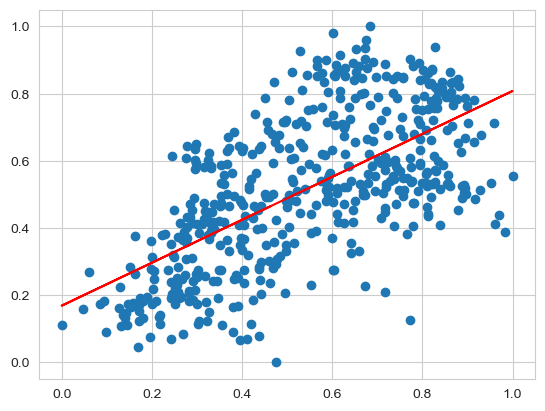

In [31]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.639*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [32]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           5.80e-61
Time:                        22:46:31   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So lets add yr to it

In [33]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [34]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [35]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.25e-130
Time:                        22:46:31   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

#### R-squared increded to 0.7, as we saw there is a correlation with season we can add that

In [36]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','season']]

In [37]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.051740
temp      0.515487
yr        0.239221
season    0.125407
dtype: float64

In [38]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     452.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.85e-143
Time:                        22:46:31   Log-Likelihood:                 370.94
No. Observations:                 510   AIC:                            -733.9
Df Residuals:                     506   BIC:                            -716.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.014      3.597      0.0

In [39]:
#adding month to it
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','season','mnth']]

In [40]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.054413
temp      0.514568
yr        0.238988
season    0.136949
mnth     -0.015660
dtype: float64

In [41]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     338.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.81e-141
Time:                        22:46:31   Log-Likelihood:                 371.06
No. Observations:                 510   AIC:                            -732.1
Df Residuals:                     505   BIC:                            -710.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0544      0.015      3.538      0.0

## since pvalue for mnth is high and r-squared is in negative we can drop month for the model

In [42]:
#adding workingday to it
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','season','workingday']]

In [43]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.039463
temp          0.512240
yr            0.238762
season        0.126317
workingday    0.020391
dtype: float64

In [44]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     341.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.84e-142
Time:                        22:46:31   Log-Likelihood:                 372.63
No. Observations:                 510   AIC:                            -735.3
Df Residuals:                     505   BIC:                            -714.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0395      0.016      2.492      0.0

In [45]:
#P-value is higher for working day, so adding weekday to it

#adding workingday to it
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','season','weekday']]

In [46]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const      0.029971
temp       0.514847
yr         0.240417
season     0.126593
weekday    0.041948
dtype: float64

In [47]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     345.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.17e-143
Time:                        22:46:31   Log-Likelihood:                 374.66
No. Observations:                 510   AIC:                            -739.3
Df Residuals:                     505   BIC:                            -718.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0300      0.016      1.830      0.0

In [48]:
# so adding weathersit to it

# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','season','weekday','weathersit']]

In [49]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.074884
temp          0.486094
yr            0.236645
season        0.138902
weekday       0.050515
weathersit   -0.189299
dtype: float64

In [50]:
#as weathersit is negatively correllated removing it

# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr','season','weekday']]

In [51]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const      0.029971
temp       0.514847
yr         0.240417
season     0.126593
weekday    0.041948
dtype: float64

In [52]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     345.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.17e-143
Time:                        22:46:31   Log-Likelihood:                 374.66
No. Observations:                 510   AIC:                            -739.3
Df Residuals:                     505   BIC:                            -718.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0300      0.016      1.830      0.0

#### As above model can explain the variance upto 73 % this is the best fit model. Also these are the significat variables 'temp', 'yr','season','weekday' with respect to the target varaible cnt

##  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
X_train_lm.head()

,const,temp,yr,season,weekday
653,1.0,0.509887,1.0,1.000000,0.333333
576,1.0,0.815169,1.0,0.666667,0.333333
426,1.0,0.442393,1.0,0.000000,1.000000
728,1.0,0.245101,1.0,0.000000,0.000000
482,1.0,0.395666,1.0,0.333333,1.000000


In [54]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

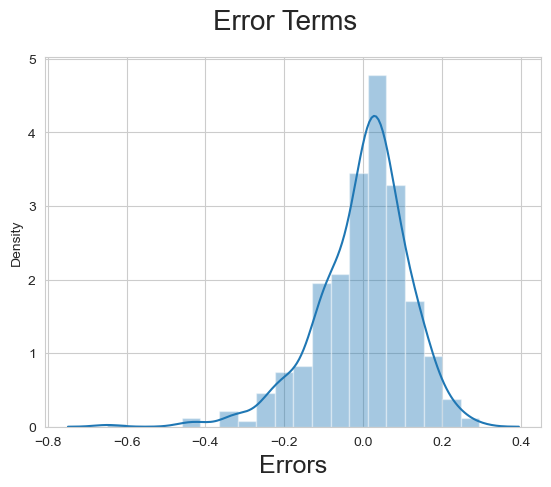

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

#### Applying the scaling on the test sets

In [56]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['weekday', 'weathersit', 'temp', 'cnt','yr','season','mnth']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [57]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.479452,0.497717,0.036530,0.503044,0.698630,0.187215,0.546312,0.516216
std,0.369821,0.500722,0.311080,0.188034,0.331402,0.459904,0.269422,0.249189,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.328479,0.359882
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.546045,0.520241
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.759735,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test
# Assign all the feature variables to X
X_test_lm = X_test[['temp', 'yr','season','weekday']]



In [59]:
X_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp
184,0.666667,0.0,0.545455,1,0.166667,0,0.5,0.837241
535,0.333333,1.0,0.454545,0,0.500000,1,0.0,0.911423
299,1.000000,0.0,0.818182,0,0.666667,1,0.5,0.496221
221,0.666667,0.0,0.636364,0,0.500000,1,0.0,0.890387
152,0.333333,0.0,0.454545,0,0.666667,1,0.0,0.821739


In [60]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test_lm)
X_test_m.head()

,const,temp,yr,season,weekday
184,1.0,0.837241,0.0,0.666667,0.166667
535,1.0,0.911423,1.0,0.333333,0.500000
299,1.0,0.496221,0.0,1.000000,0.666667
221,1.0,0.890387,0.0,0.666667,0.500000
152,1.0,0.821739,0.0,0.333333,0.666667


In [61]:
# Making predictions using the fourth model

X_test_m.shape
y_test.shape

(219,)

In [62]:
# Making predictions using the the model

y_pred_m = lr.predict(X_test_m)

Text(0, 0.5, 'y_pred')

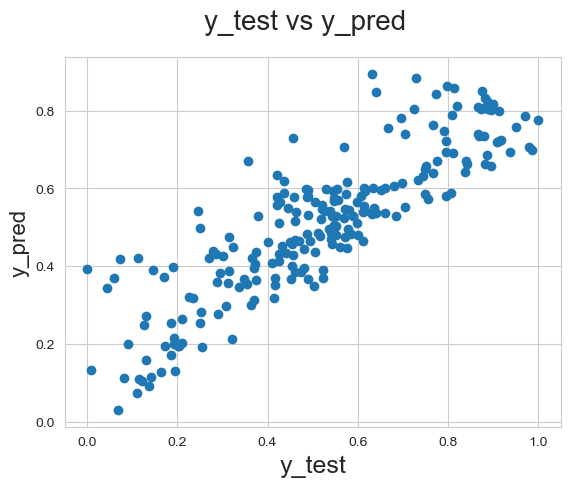

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 



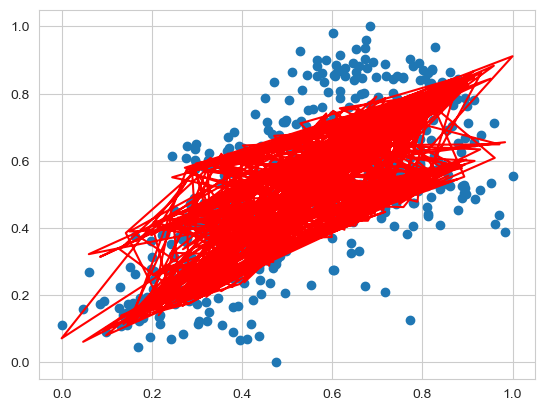

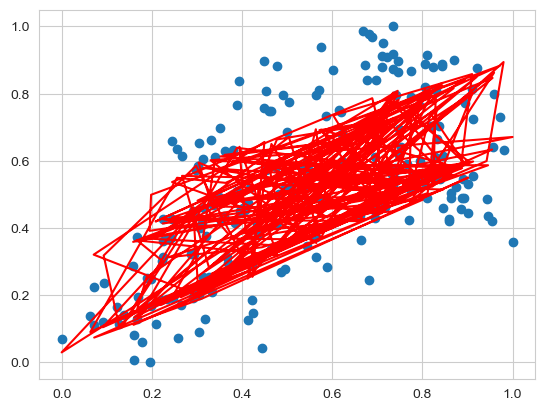

In [64]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], (0.030 +(0.5148*X_train_lm.iloc[:, 1])+(0.2404*X_train_lm.iloc[:, 2])+(0.1266*X_train_lm.iloc[:, 3])+(0.0419*X_train_lm.iloc[:, 4])), 'r')
plt.show()


# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_test_m.iloc[:, 1], y_test)
plt.plot(X_test_m.iloc[:, 1], (0.030 +(0.5148*X_test_m.iloc[:, 1])+(0.2404*X_test_m.iloc[:, 2])+(0.1266*X_test_m.iloc[:, 3])+(0.0419*X_test_m.iloc[:, 4])), 'r')
plt.show()



### Calculating VIF  to cross check the significant variables

In [65]:
# Read the given CSV file, and view some sample records

day_vif = pd.read_csv("day.csv")
day_vif.head()
day_vif=day_vif.drop(columns=['instant','dteday'],axis=1)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day_vif, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[day_vif.columns] = scaler.fit_transform(df_train[day_vif.columns])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,1.000000,1.0,0.818182,0.0,0.333333,1.0,0.0,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
576,0.666667,1.0,0.545455,0.0,0.333333,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.000000,1.0,0.181818,0.0,1.000000,0.0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.333333,1.0,0.272727,0.0,1.000000,0.0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


In [67]:
y_train_vif = df_train.pop('cnt')
X_train_vif = df_train

In [68]:
X_train_lm1 = sm.add_constant(X_train_vif)

lr_1 = sm.OLS(y_train_vif, X_train_lm1).fit()

lr_1.params

const         9.575674e-16
season        2.428613e-16
yr            5.377643e-16
mnth          5.707240e-16
holiday       1.422473e-16
weekday       5.481726e-16
workingday    6.765422e-16
weathersit   -1.942890e-16
temp          4.440892e-16
atemp         0.000000e+00
hum           6.383782e-16
windspeed    -2.081668e-17
casual        3.774735e-01
registered    7.968247e-01
dtype: float64

In [69]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.266e+29
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:46:32   Log-Likelihood:                 16346.
No. Observations:                 510   AIC:                        -3.266e+04
Df Residuals:                     496   BIC:                        -3.260e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.576e-16    9.8e-16      0.977      0.3

#### Multicollinearity --  temp, atemp,windspeed , hence dropping atemp and windspeed
##### we can check VIF for all these variables and then make a descision


In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,350.72
7,temp,335.54
12,registered,40.49
9,hum,16.66
2,mnth,13.43
0,season,12.26
5,workingday,10.06
11,casual,9.09
1,yr,5.72
10,windspeed,3.81


In [72]:
# dropping atemp as it is showing high correlation with temp
X = X_train_vif.drop('atemp', axis=1)
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
653,1.000000,1.0,0.818182,0.0,0.333333,1.0,0.0,0.509887,0.575354,0.300794,0.280402,0.951776
576,0.666667,1.0,0.545455,0.0,0.333333,1.0,0.0,0.815169,0.725633,0.264686,0.294422,0.899220
426,0.000000,1.0,0.181818,0.0,1.000000,0.0,0.5,0.442393,0.640189,0.255342,0.290765,0.446145
728,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.245101,0.498067,0.663106,0.110332,0.203869
482,0.333333,1.0,0.272727,0.0,1.000000,0.0,0.5,0.395666,0.504508,0.188475,0.340750,0.444701


In [73]:
# Build a third fitted model
X_train_lm1 = sm.add_constant(X)

lr_2 = sm.OLS(y_train_vif, X_train_lm1).fit()

In [74]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.836e+31
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:46:32   Log-Likelihood:                 17741.
No. Observations:                 510   AIC:                        -3.546e+04
Df Residuals:                     497   BIC:                        -3.540e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.163e-17   6.34e-17     -0.656      0.5

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,registered,40.18
7,temp,16.37
8,hum,15.96
2,mnth,13.43
0,season,12.26
5,workingday,10.06
10,casual,9.09
1,yr,5.69
9,windspeed,3.74
4,weekday,3.19


In [76]:
# dropping 'registered','casual' as cnt is summation of these
X = X.drop(columns=['registered','casual'], axis=1)
#X = X.drop(columns=['atemp'], axis=1)
X.head()
# Build a third fitted model
X_train_lm1 = sm.add_constant(X)

lr_2 = sm.OLS(y_train_vif, X_train_lm1).fit()
# Print the summary of the model
print(lr_2.summary())
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.84e-169
Time:                        22:46:32   Log-Likelihood:                 454.07
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     499   BIC:                            -839.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1858      0.032      5.820      0.0

,Features,VIF
8,hum,15.29
2,mnth,13.32
0,season,11.30
7,temp,7.95
9,windspeed,3.66
5,workingday,3.14
4,weekday,3.03
6,weathersit,2.17
1,yr,2.01
3,holiday,1.09


In [77]:
# dropping 'hum','mnth','workingday' 'holiday' as these have high pvalues
X = X.drop(columns=['mnth','hum','workingday'], axis=1)

X.head()
# Build a third fitted model
X_train_lm1 = sm.add_constant(X)

lr_2 = sm.OLS(y_train_vif, X_train_lm1).fit()
# Print the summary of the model
print(lr_2.summary())
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     287.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.15e-171
Time:                        22:46:32   Log-Likelihood:                 449.35
No. Observations:                 510   AIC:                            -882.7
Df Residuals:                     502   BIC:                            -848.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1425      0.019      7.699      0.0

,Features,VIF
5,temp,5.32
6,windspeed,3.17
0,season,3.14
3,weekday,2.83
1,yr,1.98
4,weathersit,1.51
2,holiday,1.03


## Lr2 model is best fit as its R-squared is 80% compared to the Lr1 model for which the R-squared was 73%

### Residual Analysis of the train data

In [78]:
y_train_cnt = lr_2.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

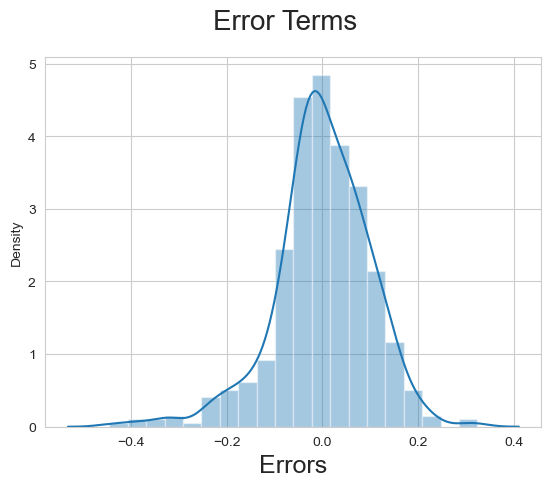

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_vif - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [80]:
### Making Predictions Using the Final Model

In [81]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_test[day_vif.columns] = scaler.fit_transform(df_test[day_vif.columns])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
653,1.000000,1.0,0.818182,0.0,0.333333,1.0,0.0,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776
576,0.666667,1.0,0.545455,0.0,0.333333,1.0,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220
426,0.000000,1.0,0.181818,0.0,1.000000,0.0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145
728,0.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869
482,0.333333,1.0,0.272727,0.0,1.000000,0.0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701


In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)

In [84]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m2 = X_test_m2.drop(['mnth','hum','workingday','atemp','registered','casual'], axis = 1)

In [85]:
# Making predictions using the second model

y_pred_m2 = lr_2.predict(X_test_m2)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

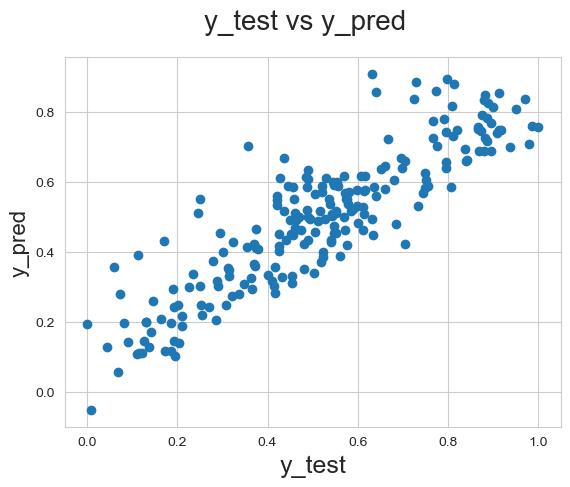

In [86]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      